In [29]:
%run difraciones.py #Cargar las librerias

In [16]:
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as p
from time import time
#p.switch_backend('QtAgg4')
#%matplotlib qt
#Figuras fuera del notebook

Este código requiere importar:
numpy, matplotlib, pandas, time y Jupyter Notebook

Los archivos incluidos son:
difraciones.py --> contiene la libreria (funciones) para ejecutar el simulador
estrellas.dat --> contiene datos propios del tipo espectral de la estrella: luminosidad, temperatura y magnitud absoluta.
listadat.txt --> contiene en forma ordenada el nombre del archivo que describe la convolucion del filtro y la emision espectral de la estrella (Ojo para TAOS-1)
folder "spectra" --> contiene todos los archivos de convoluciones  de la emision estelar y el filtro de TAOS-1 

In [19]:
#Parametros basicos para el calculo
M=4096 # Tamano de la malla en [px] 2048
lamb=600e-9 # Long de onda en [m]


#Parametros de la observacion (conocidos a Priori)
vE=29800 # velocidad de traslacion de la tierra  en m/s
vr=5000 #velocidad del cuerpo Pos si va en contra de la direccion de la tierra
ang=0 #angulo desde oposicion para calcular velocidad tangencial del objeto
fps=20 #frames por segundo
mV=14 # Mad=gnitud aparente de la estrella
nEst=8 #Seleccion de tipo espectral de estrella
#A0=1;A1=2;A2=3;A3=4;A4=5;A5=6;A7=7;F0=8;F2=9;F3=10;F5=11;F6=12;F7=13;F8=14
#G0=15;G1=16;G2=17;G5=18;G8=19;K0=20;K1=21;K2=22;K3=23;K4=24;K5=25;K7=26;
#M0=27;M1=28;M2=29;M3=30;M4=31;M5=32;M6=33;M7=34;M8=35
nLamb=10 # Num de longitudes de onda a considerar para el calculo espectral spectra()


#Parametros del evento de ocultacion (desconocidos) incluir d
d=2500 # Diam del objeto en [m]
ua=50 #Distancia del objeto en unidades astronómicas
D=calc_plano(d,lamb,ua) #Tamano del plano total en [m]
toffset=0 #en pixeles
T=0 # direccion de lectura en grados
b=0 # Parametro de impacto en metros


CALCULOS INICIALES PARA DEFINIR OBJETOS Y SU PATRON DE DIFRACCION BASICO

In [20]:
inicio=time()
#Definiendo objetos
O1=pupilCO(M,D,d) #Objeto 1: circular
O2=pupil_doble(M,D,d) #Objeto 2: contact binary
z=1.496e11*ua #Distancia del objeto en [m]
I1=fresnel(O1,M,D,z,lamb) #Patron 1 de difraccion monocromatico con fuente puntual
I2=fresnel(O2,M,D,z,lamb) #Patron 2 de difraccion monocromatico con fuente puntual
#I0=add_ruido(I0,mV)
time()-inicio

6.052507162094116

In [ ]:
GRAFICAR RESULTADOS

In [23]:
#Objeto Circular
p.figure(1)
p.clf()
p.imshow(O1,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.gray()
p.title('Objeto Circular')

p.figure(2)
p.clf()
p.imshow(I1,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.title('Patron de difraccion, objeto circular')

#Objeto no circular
p.figure(3)
p.clf()
p.imshow(O2,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.gray()
p.title('Objeto Binario')

p.figure(4)
p.clf()
p.imshow(I2,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.title('Patron de difraccion, objeto binario')

Text(0.5, 1.0, 'Patron de difraccion, objeto binario')

In [30]:
#CALCULAR PATRON CON CONTRIBUCION ESPECTRAL y GRAFICAR
inicio=time()
z=1.496e11*ua #Distancia del objeto en [m]
I1s=spectra(O2,M,D,z,nEst,nLamb)#Esta funcion calcula el patron cromatico
tipo,R_star=calc_rstar(mV,nEst,ua)#Funcion para calcular el radio y tipo de la estrella usa estrellas.dat
p.figure(5)
p.clf()
p.imshow(I1s,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.title('Patron de difraccion cromatico: '+tipo+', Longs. Onda: '+np.str(np.round(nLamb))) 
time()-inicio

22.860803842544556

6.819113254547119

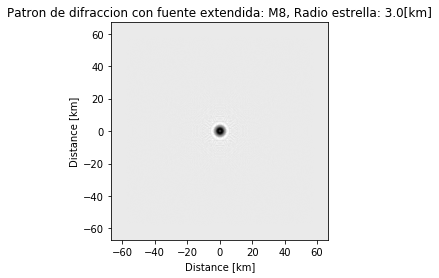

In [8]:
#CALCULAR PATRON PARA FUENTE EXTENDIDA
inicio=time()
z=1.496e11*ua #Distancia del objeto en [m]
tipo,R_star=calc_rstar(mV,nEst,ua)#Funcion para calcular el radio de la estrella usa estrellas.dat
I1f=promedio_PD(I1,R_star,D,M,d) #Funcion para calcular contribucion de fuente extendida
p.figure(6)
p.clf()
p.imshow(I1f,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.title('Patron de difraccion con fuente extendida: '+tipo+', Radio estrella: '+np.str(np.round(R_star/1000))+'[km]') 
time()-inicio


In [26]:
#AGREGAR RUIDO DE POISSON
inicio=time()
snr=SNR_TAOS2(mV)#Calcular senal a ruido segun TAOS-2
I1n=add_ruido(I1,mV) # Obtener patron de difraccion con ruido 
p.figure(7)
p.clf()
p.imshow(I1n,extent=[-D/2000,D/2000,-D/2000,D/2000])
p.gray()
p.xlabel('Distance [km]')
p.ylabel('Distance [km]')
p.title('Patron de difraccion con ruido mV: '+np.str(mV)+', SNR: '+np.str(np.round(snr)))

time()-inicio

1.0327260494232178

In [31]:
#EXTRAER PERFIL DE DIFRACCION ojo T--> grados y b --> metros
x,y=extraer_perfil(I1s,M,D,T,b) #Extraer perfil de difraccion sin ruido
xn,yn=extraer_perfil(I1n,M,D,T,b) #Extraer perfil de difraccion con ruido
p.figure(15)
p.clf()
p.plot(x/1000,y)
p.xlabel('Distance [km]')
p.ylabel('Normalized intensity')
p.figure(9)
p.clf()
p.plot(xn/1000,yn)
p.xlabel('Distance [km]')
p.ylabel('Normalized intensity')

Text(0, 0.5, 'Normalized intensity')

Text(0, 0.5, 'Normalized intensity')

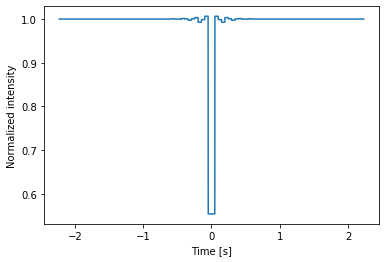

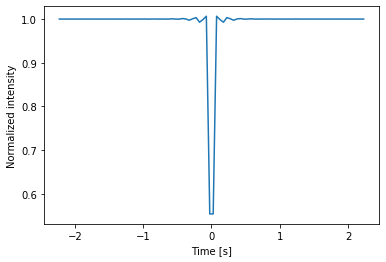

In [11]:
#MUESTREAR SEGUN PARAMETROS CONOCIDOS DEFINIDOS AL PRINCIPIO
x1,y1,x2,y2=muestreos(y,D,vr,fps,toffset,vE,ang,ua) #fUNCION PARA MUESTREAR genera dos tuplas
p.figure(10)
p.clf()
p.plot(x1,y1)
p.xlabel('Time [s]')
p.ylabel('Normalized intensity')
p.figure(11)
p.clf()
p.plot(x2,y2)
p.xlabel('Time [s]')
p.ylabel('Normalized intensity')
